In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Activation, Dense
from tensorflow.keras.models import Sequential
from feature_engine.encoding import OrdinalEncoder
from keras import optimizers
import pickle

In [2]:
print(tensorflow.__version__)

2.10.0


### Field Master Data, Climate Data and Satellite Images Indexes Pandas Dataframe

In [3]:
raw_df = pd.read_csv(r'C:\Users\sbarrios\OneDrive - Universidad Galileo\Data Science\Python\Proyectos\Pruebas\Pantaleon\Optimizador Cosecha\DatosModeloBPP.csv')
raw_df

,Unnamed: 0,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,...,EDAD,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.8938,0,PROTECTANTE,...,390,18.2185,15.52135,85.0464,68.12,69.846,14.08995,130.28605,20.0,CORE
1,1,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.8938,0,PROTECTANTE,...,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.8938,0,PROTECTANTE,...,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.8938,0,PROTECTANTE,...,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.8938,0,PROTECTANTE,...,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252633,252633,22-23,100083002,ENE,MECANICO,15.72,CG02-163,129.6200,8,GLIFOSATO + BORO,...,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252634,252634,22-23,100083002,ENE,MECANICO,15.72,CG02-163,129.6200,8,GLIFOSATO + BORO,...,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252635,252635,22-23,100083002,ENE,MECANICO,15.72,CG02-163,129.6200,8,GLIFOSATO + BORO,...,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252636,252636,22-23,100083002,ENE,MECANICO,15.72,CG02-163,129.6200,8,GLIFOSATO + BORO,...,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sample Based Filtering
Since not all observations have a "Brix", "Pol" or "Purity" sample associated, we remove the observations with NULL values on the previously mentioned targets.

This samples include the "pre-application", "pre-harvest" and "core sampler" phases.

In [4]:
df = raw_df[raw_df['Brix'].notnull()]
df = df.drop("Unnamed: 0",axis=1)
df

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,EDAD,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.89380,0,PROTECTANTE,PROTECTANTE-0,...,390,18.218500,15.521350,85.046400,68.120000,69.846000,14.089950,130.286050,20.0,CORE
19,20-21,100045403,ABR,MANUAL,49.62,CG02-163,109.89380,0,PROTECTANTE,PROTECTANTE-0,...,390,18.250000,15.025000,82.327000,72.800000,72.090000,12.293000,126.588000,1.0,CORE
78,20-21,10101113,ENE,MECANICO,47.58,CP72-2086,106.97625,12,TRINEXAPAC,TRINEXAPAC-12,...,370,17.141429,14.321714,83.441714,69.757143,72.022857,13.662429,117.783429,7.0,CORE
79,20-21,10101113,ENE,MECANICO,47.58,CP72-2086,106.97625,12,TRINEXAPAC,TRINEXAPAC-12,...,370,16.438333,13.810500,83.924083,69.235000,72.151250,13.809292,113.320000,24.0,CORE
152,20-21,10199303,FEB,MANUAL,6.39,CG02-163,134.49922,0,PROTECTANTE,PROTECTANTE-0,...,384,21.270000,19.600000,92.147000,56.000000,62.786000,19.349000,145.433000,1.0,CORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252387,22-23,10032106,ENE,MANUAL,7.85,CG02-163,73.91000,10,TRINEXAPAC,TRINEXAPAC-10,...,326,18.050000,15.586554,86.336644,68.000000,71.365000,14.077000,127.266546,2.0,PRE
252448,22-23,10202701,ENE,MECANICO,64.26,ECU-01,115.05000,10,GLIFOSATO + BORO,GLIFOSATO + BORO-10,...,352,21.103333,18.471733,87.534766,68.027467,67.666000,13.982425,150.975484,15.0,PRE
252520,22-23,100082701,FEB,MECANICO,1.27,CG02-163,122.69000,0,MADUREZ NATURAL,MADUREZ NATURAL-0,...,286,18.066667,84.721371,68.613333,12.571111,71.233333,13.756867,125.711111,3.0,PRE
252521,22-23,100082701,FEB,MECANICO,1.27,CG02-163,122.69000,0,MADUREZ NATURAL,MADUREZ NATURAL-0,...,286,18.066667,84.721371,68.613333,12.571111,71.233333,13.756867,125.711111,3.0,PRE


### Categorical Variables Enconding
All categorical variables are transformed for use in the ANN.
Also, all time related variables are removed from the dataset.

In [5]:
od = OrdinalEncoder(encoding_method='arbitrary')
od.fit(df)
final_df = od.transform(df)
final_df.drop(["FECHA_CORTE","FECHA_IMG","fecha_aplicacion","Fecha_cli"],axis=1,inplace=True)

## Brix Model

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

In [6]:
# Define the Keras model
brix_model = Sequential()
brix_model.add(Dense(10, input_shape=(81,), activation='relu'))
brix_model.add(Dense(20, activation='relu'))
brix_model.add(Dense(1))

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

In [7]:
# Compile model
brix_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])
brix_model

### Design Matrix "X" and Target "y"
For this specific model, the target is set to "Brix"

In [8]:
# Features and Target
X = final_df.drop(['Pol', 'Brix', 'Pureza'], axis=1)
y = final_df['Brix']
X.head()

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,AGUA_POND30,HUMEDAD_AVG30,HUMEDAD_PRODUCTO_CORE,EDAD,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.03604,70.65034,70.08450,390,68.120000,69.846000,14.089950,130.286050,20.0,0
19,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.04285,72.80655,70.08450,390,72.800000,72.090000,12.293000,126.588000,1.0,0
78,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04132,71.29240,70.81194,370,69.757143,72.022857,13.662429,117.783429,7.0,0
79,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04244,71.38955,70.81194,370,69.235000,72.151250,13.809292,113.320000,24.0,0
152,0,10199303,2,0,6.39,0,134.49922,0,0,0,...,0.04983,72.75353,70.47022,384,56.000000,62.786000,19.349000,145.433000,1.0,0


### Train / Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Keras Neural Network

In [10]:
# Fit the network
brix_model_history = brix_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=20)

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 9754956.0000 - mae: 74.1853 - val_loss: 308.5424 - val_mae: 17.4169
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 301.3972 - mae: 17.2104 - val_loss: 293.5622 - val_mae: 16.9814
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 283.9014 - mae: 16.6933 - val_loss: 270.8169 - val_mae: 16.2979
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 255.4064 - mae: 15.8153 - val_loss: 238.0147 - val_mae: 15.2584
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 219.5724 - mae: 14.6368 - val_loss: 199.5057 - val_mae: 13.9395
Epoch 6/50
153/153 [==============================] - 0s 1ms/step - loss: 179.0449 - mae: 13.1794 - val_loss: 157.4457 - val_mae: 12.3390
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 136.5160 - mae: 11.4455 - val_loss: 114.7591 - val_mae: 10.4685
Epoch 8/50
153/153 [==========

### Save Keras model to Disk

In [11]:
pickle.dump(brix_model, open('brix_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://e9506782-27a5-4006-afdb-bd690a3bd7e8/assets


### Evaluating the Model Accuracy and Loss with Learning Curve

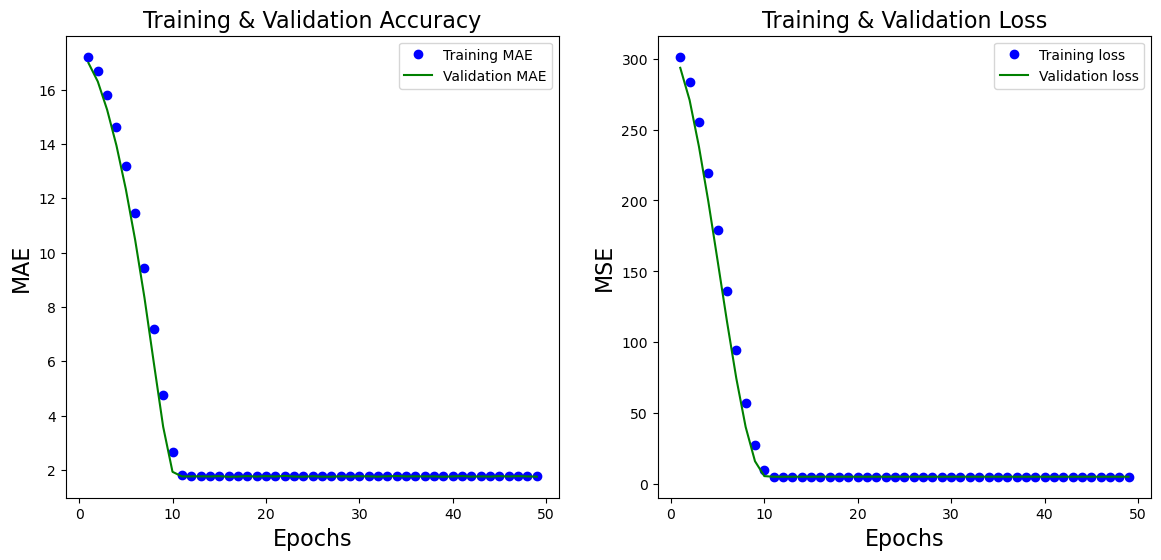

In [12]:
history_dict = brix_model_history.history
history_dict['loss'].pop(0)
history_dict['val_loss'].pop(0)
history_dict['mae'].pop(0)
history_dict['val_mae'].pop(0)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('MSE', fontsize=16)
ax[1].legend()

## Pol Model

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

In [13]:
# Define the Keras model
pol_model = Sequential()
pol_model.add(Dense(10, input_shape=(81,), activation='relu'))
pol_model.add(Dense(20, activation='relu'))
pol_model.add(Dense(1))

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

In [14]:
# Compile model
pol_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.005),
                loss='mse',
                metrics=['mae'])
pol_model

### Design Matrix "X" and Target "y"
For this specific model, the target is set to "Pol"

In [15]:
# Features and Target
X = final_df.drop(['Pol', 'Brix', 'Pureza'], axis=1)
y = final_df['Pol']
X.head()

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,AGUA_POND30,HUMEDAD_AVG30,HUMEDAD_PRODUCTO_CORE,EDAD,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.03604,70.65034,70.08450,390,68.120000,69.846000,14.089950,130.286050,20.0,0
19,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.04285,72.80655,70.08450,390,72.800000,72.090000,12.293000,126.588000,1.0,0
78,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04132,71.29240,70.81194,370,69.757143,72.022857,13.662429,117.783429,7.0,0
79,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04244,71.38955,70.81194,370,69.235000,72.151250,13.809292,113.320000,24.0,0
152,0,10199303,2,0,6.39,0,134.49922,0,0,0,...,0.04983,72.75353,70.47022,384,56.000000,62.786000,19.349000,145.433000,1.0,0


### Train / Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Keras Neural Network

In [17]:
# Fit the network
pol_model_history = pol_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=20)

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 2193025280.0000 - mae: 1713.1366 - val_loss: 315.9599 - val_mae: 16.1304
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 257.3921 - mae: 15.3251 - val_loss: 293.1472 - val_mae: 15.4071
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 234.6854 - mae: 14.5677 - val_loss: 270.2372 - val_mae: 14.6448
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 213.1056 - mae: 13.8069 - val_loss: 248.5671 - val_mae: 13.8852
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 192.7713 - mae: 13.0469 - val_loss: 228.0744 - val_mae: 13.1265
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 173.4612 - mae: 12.2871 - val_loss: 208.6862 - val_mae: 12.3660
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 155.4185 - mae: 11.5276 - val_loss: 190.5164 - val_mae: 11.6081
Epoch 8/50
153/153 [=====

### Save Keras model to Disk

In [18]:
pickle.dump(pol_model, open('pol_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://17dbe062-0c08-4c03-a3a0-8f5b2f83f536/assets


### Evaluating the Model Accuracy and Loss with Learning Curve

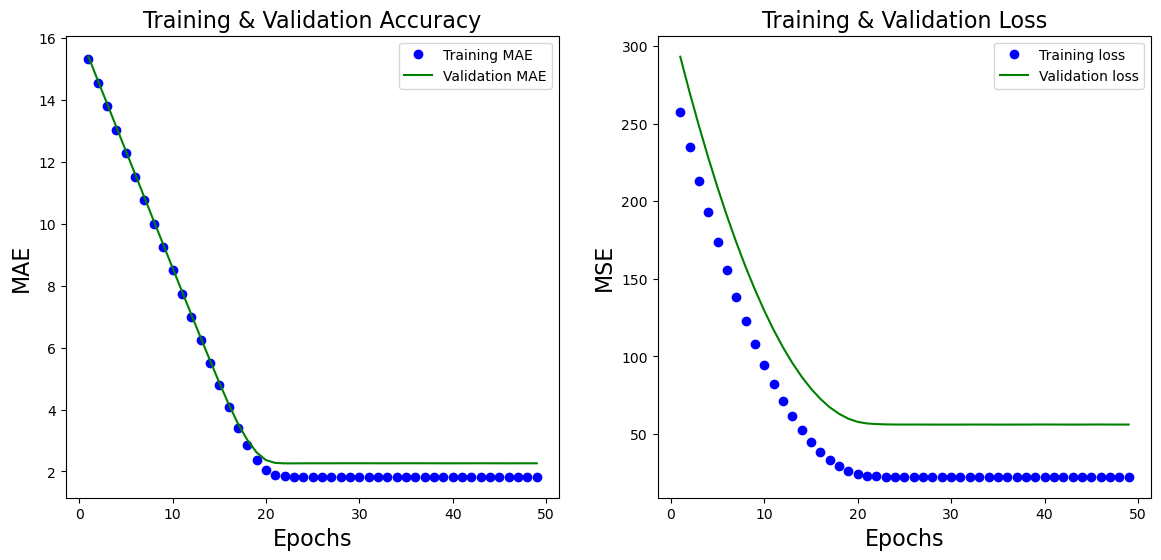

In [19]:
history_dict = pol_model_history.history
history_dict['loss'].pop(0)
history_dict['val_loss'].pop(0)
history_dict['mae'].pop(0)
history_dict['val_mae'].pop(0)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('MSE', fontsize=16)
ax[1].legend()

## Purity Model

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

In [20]:
# Define the Keras model
purity_model = Sequential()
purity_model.add(Dense(10, input_shape=(81,), activation='relu'))
purity_model.add(Dense(20, activation='relu'))
purity_model.add(Dense(1))

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

In [21]:
# Compile model
purity_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.03),
                loss='mse',
                metrics=['mae'])
purity_model

### Design Matrix "X" and Target "y"
For this specific model, the target is set to "Purity"

In [22]:
# Features and Target
X = final_df.drop(['Pol', 'Brix', 'Pureza'], axis=1)
y = final_df['Pureza']
X.head()

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,AGUA_POND30,HUMEDAD_AVG30,HUMEDAD_PRODUCTO_CORE,EDAD,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.03604,70.65034,70.08450,390,68.120000,69.846000,14.089950,130.286050,20.0,0
19,0,100045403,0,0,49.62,0,109.89380,0,0,0,...,0.04285,72.80655,70.08450,390,72.800000,72.090000,12.293000,126.588000,1.0,0
78,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04132,71.29240,70.81194,370,69.757143,72.022857,13.662429,117.783429,7.0,0
79,0,10101113,1,1,47.58,1,106.97625,12,1,1,...,0.04244,71.38955,70.81194,370,69.235000,72.151250,13.809292,113.320000,24.0,0
152,0,10199303,2,0,6.39,0,134.49922,0,0,0,...,0.04983,72.75353,70.47022,384,56.000000,62.786000,19.349000,145.433000,1.0,0


### Train / Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Keras Neural Network

In [24]:
# Fit the network
purity_model_history = purity_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=20)

Epoch 1/50
153/153 [==============================] - 1s 2ms/step - loss: 41123212.0000 - mae: 201.4637 - val_loss: 6957.5947 - val_mae: 83.3359
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 6599.1514 - mae: 81.1638 - val_loss: 6215.8960 - val_mae: 78.7602
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 5877.7207 - mae: 76.5895 - val_loss: 5516.5156 - val_mae: 74.1875
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 5198.2695 - mae: 72.0164 - val_loss: 4859.0640 - val_mae: 69.6156
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 4560.4526 - mae: 67.4444 - val_loss: 4243.1079 - val_mae: 65.0414
Epoch 6/50
153/153 [==============================] - 0s 1ms/step - loss: 3964.7209 - mae: 62.8733 - val_loss: 3669.6448 - val_mae: 60.4724
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 3411.1370 - mae: 58.3040 - val_loss: 3138.0918 - val_mae: 55.9049
Epoch 8/50
153/

### Save Keras model to Disk

In [25]:
pickle.dump(purity_model, open('purity_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://db0cbc5a-3828-4637-b275-5632cccb72b1/assets


### Evaluating the Model Accuracy and Loss with Learning Curve

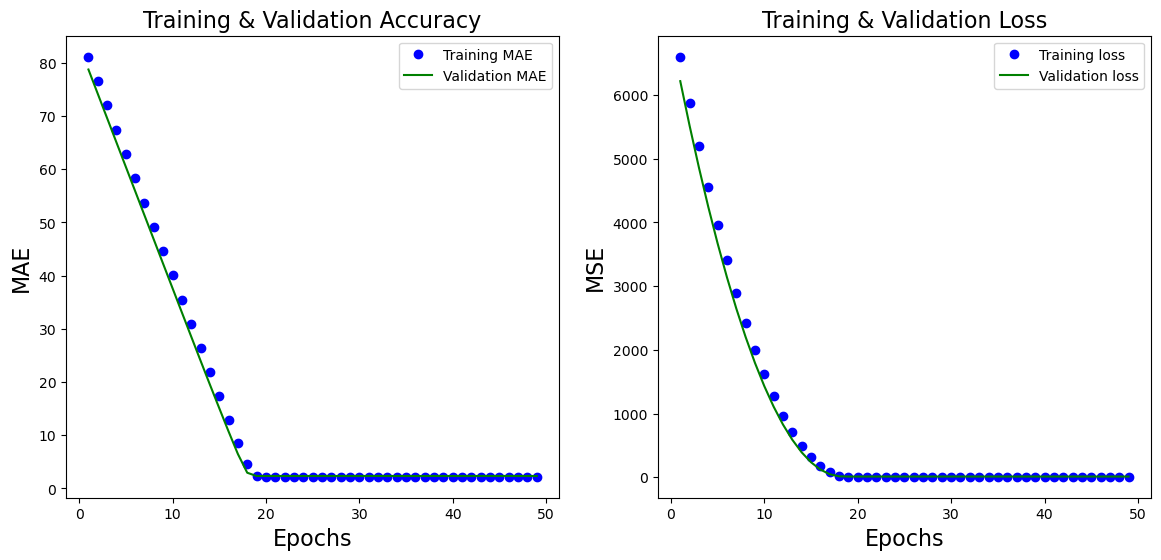

In [26]:
history_dict = purity_model_history.history
history_dict['loss'].pop(0)
history_dict['val_loss'].pop(0)
history_dict['mae'].pop(0)
history_dict['val_mae'].pop(0)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('MSE', fontsize=16)
ax[1].legend()